<a href="https://colab.research.google.com/github/williamokomba/williamokomba-moringa_school_dsc6_week_2_IP/blob/main/%22Moringa_Data_Science_Core_W2_Independent_Project_2020_10_william_okomba_Python_Notebook%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis**

## 1. Defining the Question

Dataset provided


1.   Dataset: http://bit.ly/FinancialDataset
2.   Variable Definitions: http://bit.ly/VariableDefinitions



more information about the survey.

1.   FinAccess Kenya 2018. [[link](https://fsdkenya.org/publication/finaccess2019/)]
2. Finscope Rwanda 2016. [[link](http://www.statistics.gov.rw/publication/finscope-rwanda-2016)]
3. Finscope Tanzania 2017. [[link](http://www.fsdt.or.tz/finscope/)]
3. Finscope Uganda 2018. [[link](http://www.fsdt.or.tz/finscope/)]




### a) Specifying the Data Analytic Question`

what factors/predictors that determines whether an individual has bank account

---



###b) Defining the Metric for Success

Having bank account

###c) Understanding the context

Identify whether age, country, location, influences and indivual to have bank account.

###d) Recording the Experimental Design

simple crosssection analysis

###e) Data *Relevance*

finance related dataset thus it is relevant to this research

## 2. Importing Libraries

In [552]:
# importing numpy for performing scientific computations
import numpy as np
#
# importing pandas to perform data analysis and manipulation
import pandas as pd
#
# importing matplotlib.pyplot for data visualization
import matplotlib.pyplot as plt
#
# importing seaborn for data visualization
import seaborn as sns

## 3. Reading the Data

In [553]:
# Loading the Data from the source i.e. csv
#
#Dataset: http://bit.ly/FinancialDataset
#
bank_df=pd.read_csv("http://bit.ly/FinancialDataset")
bank_df1=bank_df

##4. Checking the Data

In [554]:
#4a. Determining the no. of records in our dataset
#
bank_df1.shape

(23524, 13)

the dataset has 23524 records (rows) and 13 features/variables(colunms).

In [555]:
#4b preview all the columns
bank_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


dataset is made up of 23524 entries, 13 colunms and its 2.3+ MB

In [556]:
#4c. Previewing the top of our dataset
#
bank_df1.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [557]:
#4d. Previewing the bottom of our dataset
# 
bank_df1.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


previewing top and bottom of our dataset make us to ensure the format is the same from top to the bottom.

In [558]:
#4e. Checking whether each column has an appropriate datatype
#
bank_df1.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

the dataset has strings/objects, floats, and integers. this helps us when it comes to analysis.

## 5. External Data Source Validation

This is dataset was verified confirming with world bank data.

world bank [link](https://data.worldbank.org/indicator/FX.OWN.TOTL.SO.ZS?locations=KE)

### a.Validation

the dataset is confirmed valid

## 6. Tidying the dataset

In [559]:
#6.1a. Checking for Outliers
#
bank_df1.kurt()

year              165.195071
household_size      1.158154
Respondent Age      0.101108
dtype: float64

kurtis is greater than zero, this is high degree of peakedness thus there is outliers since it is leptpkutic kurtosis.

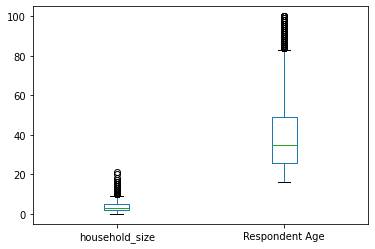

In [560]:
#6.1b. checking outliers using matplotlib
% matplotlib inline
#
bank_df1_matplotlib = bank_df.boxplot(column =['household_size', 'Respondent Age'], grid = False)
bank_df1_matplotlib

There is ouliers. however we will ignore them to avoid making our anaylsis biased.

In [561]:
#6.2 Checking for Anomalies
#
#checking for dublicates
bank_df1.duplicated().any()

False

There is no dublicates in this dataset.

In [562]:
#6.3a Identifying the Missing Data
#
bank_df1.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

There are missing values in country, has bank account, type of location, cell phone access, household size, respondent age, gender of respondent, the relationship with the head, marital status, level of education and type of job colunms. the total missing values is 267. 

100*267/23524 = 1.1% of the today popultion.. this can be dropped since they're insignifant.

In [563]:
#6.3b Data Cleaning Action:dropping all the missing values
# Explanation:this ensures the data is complete and easy to manupulate
#
bank_df1.dropna(inplace=True)

In [564]:
#6.3c. confirming all the missing values were dropped
bank_df1.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

In [565]:
#6.3d Determining the no. of records in our dataset after dropping missing values
bank_df1.shape

(23343, 13)

clean dataset(bank_df1) has 23343 records (rows) and 13 features/variables(colunms)

In [566]:
#6.4 More data cleaning procedures
#renaming colunms
bank_df1.rename(columns={"country	year":"country_year", "Has a Bank account": "Has_a_bank_account", "Type of Location":"Type_of_Location", "Cell Phone Access" : "Cell_Phone_Access", "Respondent Age": "Respondent_Age", "The relathip with head":"The_relathip_with_head", "Level of Educuation": "Level_of _Educuation", "Type of Job": "Type_of_Job"}, inplace=True)
bank_df1.head()


,country,year,uniqueid,Has_a_bank_account,Type_of_Location,Cell_Phone_Access,household_size,Respondent_Age,gender_of_respondent,The_relathip_with_head,marital_status,Level_of _Educuation,Type_of_Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


## 7. Exploratory Data Analysis(EDA)

### Descriptive Data Analysis

Data Analysis can be divided into two:
- **Univariate Analysis** - where you look at a single variable
- **Bivariate Analysis** - where you look at how two variables relate with each other
-**Multivariate Analysis**

Before we do the analysis, it is helpful to formulate questions that would help us answer the research problem.

**Research Question:** which factors influences opening bank account .

**Guiding Questions:**
- Which gender was the highest in opening bank account.
-Which country had the highest bank account holder.



### 8.0 Univariate Analysis

In [567]:
#8.1checking univariate summaries for all dataset varaibles
bank_df.describe()

,year,household_size,Respondent_Age
count,23343.000000,23343.000000,23343.000000
mean,2016.980594,3.688643,38.805509
std,0.901740,2.281184,16.519803
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


The summary statistics provide important information about the numerical variables such as their means, standard deviations, and so on.

In [568]:
#8.2 Finding the mean
respondent_mean=bank_df1["Respondent_Age"].mean()
respondent_mean

38.80550914621085

the respodent avarage age is 38year.

In [569]:
#8.3 finding the median
respondent_age_median=bank_df1["Respondent_Age"].median()
respondent_age_median

35.0

The respodent median age was 35year.

In [570]:
#8.4 finding the mode
respondent_mode=bank_df1["Respondent_Age"].mode()
respondent_mode

0    30.0
dtype: float64

the respondent mode age was 30years.

In [571]:
#8.5 finding the mean, median, max and min for the whole dataset
bank_df1.describe(include="all")

,country,year,uniqueid,Has_a_bank_account,Type_of_Location,Cell_Phone_Access,household_size,Respondent_Age,gender_of_respondent,The_relathip_with_head,marital_status,Level_of _Educuation,Type_of_Job
count,23343,23343.000000,23343,23343,23343,23343,23343.000000,23343.000000,23343,23343,23343,23343,23343
unique,4,NaN,8687,2,2,2,NaN,NaN,2,6,5,7,10
top,Rwanda,NaN,uniqueid_1715,No,Rural,Yes,NaN,NaN,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8684,NaN,4,20046,14264,17334,NaN,NaN,13767,12730,10700,12689,6361
mean,NaN,2016.980594,NaN,NaN,NaN,NaN,3.688643,38.805509,NaN,NaN,NaN,NaN,NaN
std,NaN,0.901740,NaN,NaN,NaN,NaN,2.281184,16.519803,NaN,NaN,NaN,NaN,NaN
min,NaN,2016.000000,NaN,NaN,NaN,NaN,0.000000,16.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,2016.000000,NaN,NaN,NaN,NaN,2.000000,26.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,3.000000,35.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,2018.000000,NaN,NaN,NaN,NaN,5.000000,49.000000,NaN,NaN,NaN,NaN,NaN



1.   maximum age of respodent was 100year.
2.   minimum age of the respondent was 16years
3.   the total number of respodent was 23343
4.   maximum household size was 21
5.   avarage household size was 3












### 8.3 Measures of Dispersion/Variability/Spread

##8.3a Frequency table

In [572]:
#8.3b. Frequency table for colunm using the value counts() function.
#
bank_df1['Has_account'] = bank_df1['Has_a_bank_account']
bank_df1['Has_account'] = bank_df1['Has_account'].replace(['No','Yes'],[0 , 1])
bank_df1['Has_account']= bank_df1.apply(lambda x: int(x['Has_account']), axis = 1)
#
#respodent that has bank account summary
#
bank_df1["Has_account"].value_counts(normalize=True)

0    0.858759
1    0.141241
Name: Has_account, dtype: float64

those without account is the highest at about 84%

In [573]:
#8.3c. respodent based on gender summary
bank_df1["gender_of_respondent"].value_counts(normalize=True)

Female    0.58977
Male      0.41023
Name: gender_of_respondent, dtype: float64

58% were female and 41% male

In [574]:
#8.3d bank account  based on lacation
bank_df1["Type_of_Location"].value_counts(normalize=True)


Rural    0.611061
Urban    0.388939
Name: Type_of_Location, dtype: float64

rural was the highest at 61%

In [575]:
#8.3e. bank account holder respodent based on country
bank_df1["country"].value_counts(normalize=True)

Rwanda      0.372017
Tanzania    0.278456
Kenya       0.259778
Uganda      0.089749
Name: country, dtype: float64

Randa was the highest

1.   Rwanda had 37%
2.   Tanzania 27%
3.   Kenya 25%
4.   Uganda 0.9%



In [576]:
#8.3f respodent based on level of education
bank_df1["Level_of _Educuation"].value_counts(normalize=True)

Primary education                  0.543589
No formal education                0.191364
Secondary education                0.180225
Tertiary education                 0.049008
Vocational/Specialised training    0.034314
6                                  0.001157
Other/Dont know/RTA                0.000343
Name: Level_of _Educuation, dtype: float64



1.   Primary education   54%
2.   No formal education 19%
3.   Secondary education   18%
4.   Tertiary education     0.04%
6.   Vocational/Specialised training 0.03%
7.   6                                0.001%
8.   other/dont know/rta              0.0003%



## *numerical variables*

###standant deviation

In [577]:
#8.3g Finding the standard deviation
respondent_age_std=bank_df1["Respondent_Age"].std()
respondent_age_std

16.51980349804178

this is a low std, it means the data points are close to the mean.

In [578]:
#8.3h Finding the standard deviation for the hoseholds
household_size_std=bank_df1["household_size"].std()
household_size_std

2.2811835250351495

this is a low std, it means the data points are close to the mean.

###variance

In [579]:
#8.3i Finding the variance of the respodent
respodent_age_var=bank_df1["Respondent_Age"].var()
respodent_age_var

272.90390761391353

the data have some very large dis-similarities amongst its members

In [580]:
#8.3g Finding the variance of the household size
household_size_var=bank_df1["household_size"].var()
household_size_var

5.20379827489179

the variance of household size is small, this means the data have some very large similarities amongst its members

###Range

In [581]:
#8.3j. Finding the min and max values of the Respondent_Age
Respondent_Age_max = bank_df1["Respondent_Age"].max()
Respondent_Age_min = bank_df1["Respondent_Age"].min()
# Calculating the range
Respondent_Age_range = Respondent_Age_max-Respondent_Age_min
Respondent_Age_range 

84.0

the range of the respodent age is 84years.

###Quantiles

In [582]:
#8.3k. Finding the quantiles of the Respondent_Age
#quartiles are values that divide your data into quarters provided data is sorted in an ascending order.
bank_df1["Respondent_Age"].quantile([0.25,0.5,0.75])

0.25    26.0
0.50    35.0
0.75    49.0
Name: Respondent_Age, dtype: float64


1.   Q1 is 26 years.
2.   Q2 is 35 years.
3.   Q3 is 49 years.






###skewness

In [583]:
# Determining the skeweness
respodent_age_skew=bank_df1["Respondent_Age"].skew()
respodent_age_skew

0.840661747532081

A positive value means the distribution is positively skewed. the mean is greater than the mode.

In [584]:
# Determining the skeweness 
respodent_age_kurt=bank_df1["Respondent_Age"].kurt()
respodent_age_kurt


0.09844652254807196

This is leptokurtic kurtosis isnce kurtosis is greater than zero (kurtosis>0). the tail of distribution is heavy. this means the outlier is present.

In [585]:
#Displaying the summary statistics of the dataframe
respodent_age_summary=bank_df1["Respondent_Age"].describe()
respodent_age_summary

count    23343.000000
mean        38.805509
std         16.519803
min         16.000000
25%         26.000000
50%         35.000000
75%         49.000000
max        100.000000
Name: Respondent_Age, dtype: float64

this just give the information of already discussed above.

## Visualisation Techniques

###Bar plot

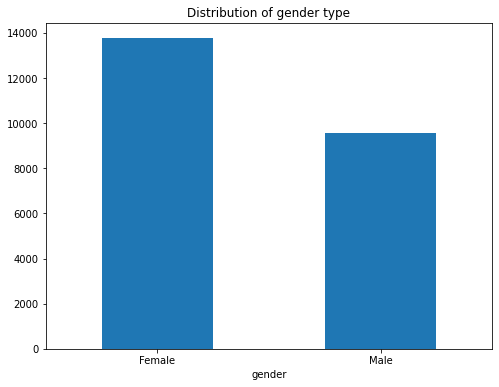

In [586]:
# create a bar plot of the 'gender_of_respondent' variable
plt.figure(figsize = (8, 6))
bank_df1.gender_of_respondent.value_counts().plot(kind = 'bar', rot = 0)
plt.xlabel('gender')
plt.title('Distribution of gender type')
plt.show()

In [587]:
# get the value counts of the 'gender_of_respondent' variable
bank_df.gender_of_respondent.value_counts()

Female    13767
Male       9576
Name: gender_of_respondent, dtype: int64

female are the highest.

###Histogram

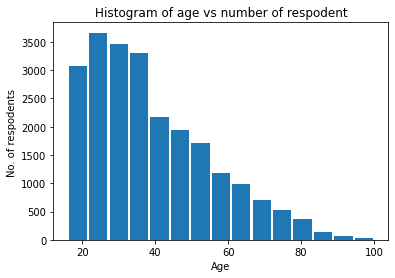

In [588]:
#creating histogram
respodent_age = bank_df1['Respondent_Age']

plt.hist(respodent_age, bins=15, histtype='bar', rwidth=0.9)
plt.xlabel('Age')
plt.ylabel('No. of respodents ')
plt.title('Histogram of age vs number of respodent')
plt.show()

In [589]:
# get the value counts of the 'gender_of_respondent' variable
bank_df1.Respondent_Age.value_counts()

30.0     1043
35.0      831
25.0      785
28.0      742
32.0      707
         ... 
100.0       5
93.0        4
96.0        3
99.0        2
97.0        1
Name: Respondent_Age, Length: 85, dtype: int64

respodents aged 30 years are the highest.

###box plot

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


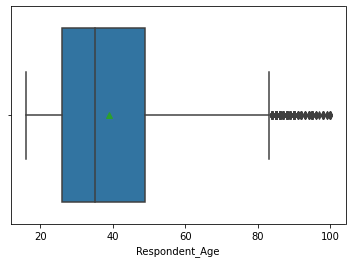

In [590]:
#box plot

sns.boxplot(bank_df1["Respondent_Age"], showmeans=True)

shows outliers

### Pie chart

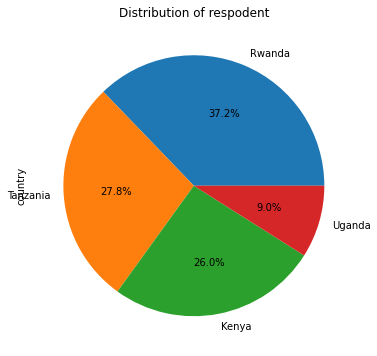

In [591]:
#creating pie chart for the country

plt.figure(figsize = (8, 6))
bank_df1.country.value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
plt.title('Distribution of respodent')
plt.show()

In [592]:
bank_df1.country.value_counts()

Rwanda      8684
Tanzania    6500
Kenya       6064
Uganda      2095
Name: country, dtype: int64

Tanzania has the highest.

##recomendations


more women has bank account thus it is superative for more awareness for the people to know the importance of the bank account.

## 9.0 Bivariate Analysis

###Scatter plot

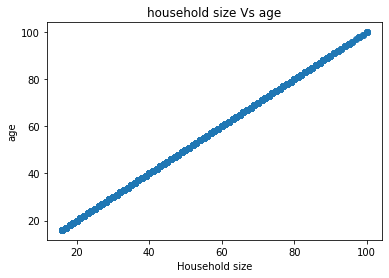

In [593]:
# Plotting our scatterplot
plt.scatter(bank_df1['Respondent_Age'], bank_df1['Respondent_Age'])

# Giving our scatterplot a title
plt.title('household size Vs age')

# Labelling our x axis
plt.xlabel('Household size')

# Labelling our y axis
plt.ylabel('age')

# Displaying our scatterplot
plt.show()

The scatterplot graph shows that the variable household size is strongly correlated to the respodent age .

This is because as the household size increases, the rspondent age also increases.

###Line graph

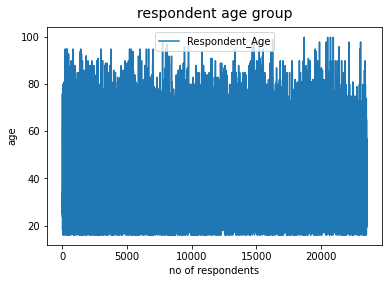

In [594]:
# plotting line chart
#

# Plotting our line graph
bank_df1[["Respondent_Age"]].plot()

# Giving a title to our line graph
plt.title("respondent age group", fontsize=14, y=1.015)

# Labelling the y-axis
plt.ylabel('age')

# Labelling the x-axis
plt.xlabel('no of respondents')

# Displaying our graph
plt.show()


note: can't draw line graph due to the nature o data given

In [595]:
#a.coverting categorical has account colunms to numerical/integer.
#
bank_df1['Has_account'] = bank_df1['Has_a_bank_account']
bank_df1['Has_account'] = bank_df1['Has_account'].replace(['No','Yes'],[0 , 1])
bank_df1['Has_account']= bank_df1.apply(lambda x: int(x['Has_account']), axis = 1)
#
#b. converting categorical country colunm to numerical/integer
bank_df1['respondent_country'] = bank_df1['country']
bank_df1['respondent_country'] = bank_df1['respondent_country'].replace(['Kenya','Uganda', "Tanzania", "Rwanda"],[0 , 1,3,4])
bank_df1['respondent_country']= bank_df1.apply(lambda x: int(x['respondent_country']), axis = 1)
#converting categorical cell_phone_access colunm to numerical/integer
bank_df1['phone_access'] = bank_df1['Cell_Phone_Access']
bank_df1['phone_access'] = bank_df1['phone_access'].replace(['No','Yes'],[0 , 1])
bank_df1['phone_access']= bank_df1.apply(lambda x: int(x['phone_access']), axis = 1)
#
#converting categorical gender_of_respondent colunm to numerical/integer
bank_df1['respodent_gender'] = bank_df1['gender_of_respondent']
bank_df1['respodent_gender'] = bank_df1['respodent_gender'].replace(['Female','Male'],[0 , 1])
bank_df1['respodent_gender']= bank_df1.apply(lambda x: int(x['respodent_gender']), axis = 1)
#
#converting categorical Type_of_Location colunm to numerical/integer
bank_df1['location'] = bank_df1['Type_of_Location']
bank_df1['location'] = bank_df1['location'].replace(['Rural','Urban'],[0 , 1])
bank_df1['location']= bank_df1.apply(lambda x: int(x['location']), axis = 1)
#
#converting categorical The_relathip_with_head colunm to numerical/integer
bank_df1['relationship'] = bank_df1['The_relathip_with_head']
bank_df1['relationship'] = bank_df1['relationship'].replace(['Head of Household','Spouse', 'Child','Parent','Other relative', 'Other non-relatives'],[0 ,1,2,3,4,5])
bank_df1['relationship']= bank_df1.apply(lambda x: int(x['relationship']), axis = 1)
#
#converting categorical marital_status colunm to numerical/integer
bank_df1['marital_status_1'] = bank_df1['marital_status']
bank_df1['marital_status_1'] = bank_df1['marital_status_1'].replace(['Married/Living together','Single/Never Married', 'Widowed','Divorced/Seperated','Dont know'],[0 ,1,2,3,4])
bank_df1['marital_status_1']= bank_df1.apply(lambda x: int(x['relationship']), axis = 1)
#
#converting categorical Level_of _Educuation colunm to numerical/integer
bank_df1['education_level'] = bank_df1['Level_of _Educuation']
bank_df1['education_level'] = bank_df1['education_level'].replace(['Primary education','No formal education', 'Secondary education','Tertiary education','Vocational/Specialised training','6','Other/Dont know/RTA'],[0 ,1,2,3,4,5,6])
bank_df1['education_level']= bank_df1.apply(lambda x: int(x['relationship']), axis = 1)
#
#converting categorical Type_of_Job colunm to numerical/integer
bank_df1['job_type'] = bank_df1['Type_of_Job']
bank_df1['job_type'] = bank_df1['job_type'].replace(['Self employed','Informally employed', 'Farming and Fishing','Remittance Dependent','Other Income','Formally employed Private','No Income','Formally employed Government','Government Dependent','Dont Know/Refuse to answer' ],[0 ,1,2,3,4,5,6,7,8,9])
bank_df1['job_type']= bank_df1.apply(lambda x: int(x['relationship']), axis = 1)

converting categorical colunms to integer help us to carry out observation

###Bivariate summeries

####pairplot

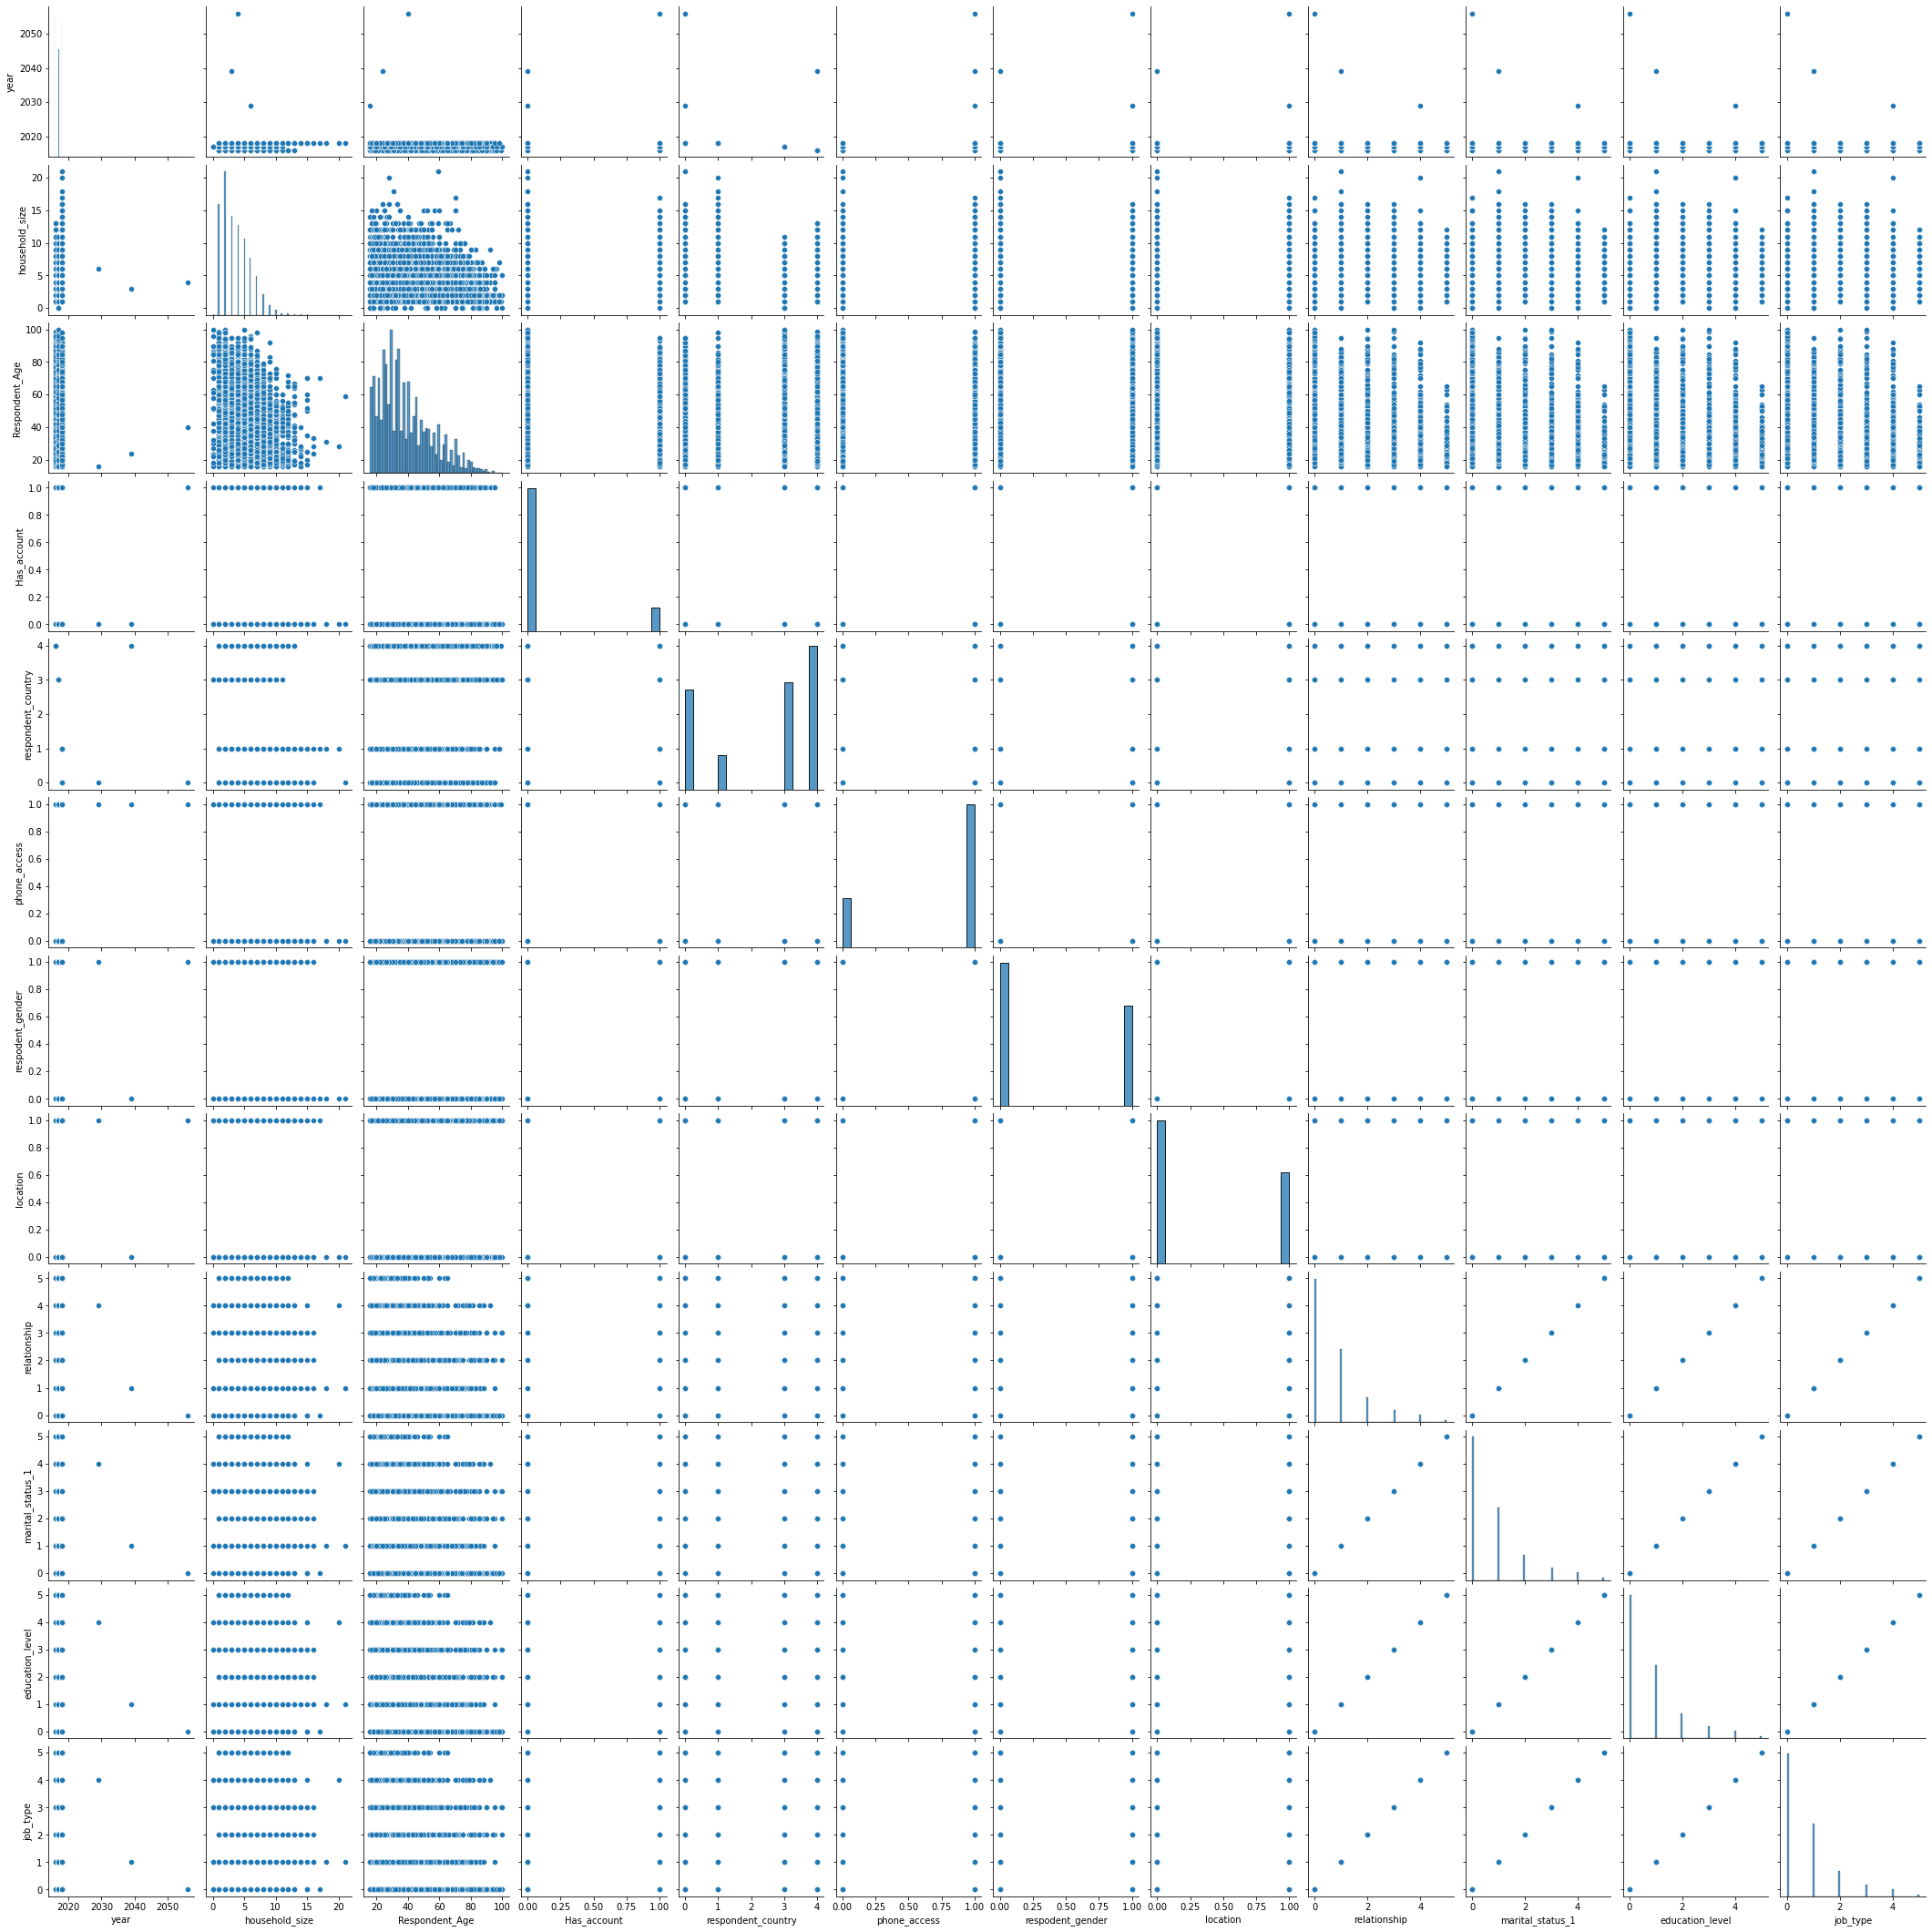

In [596]:
# Ploting the bivariate summaries and recording our observations
sns.pairplot(bank_df1)
plt.show()

####heatmap

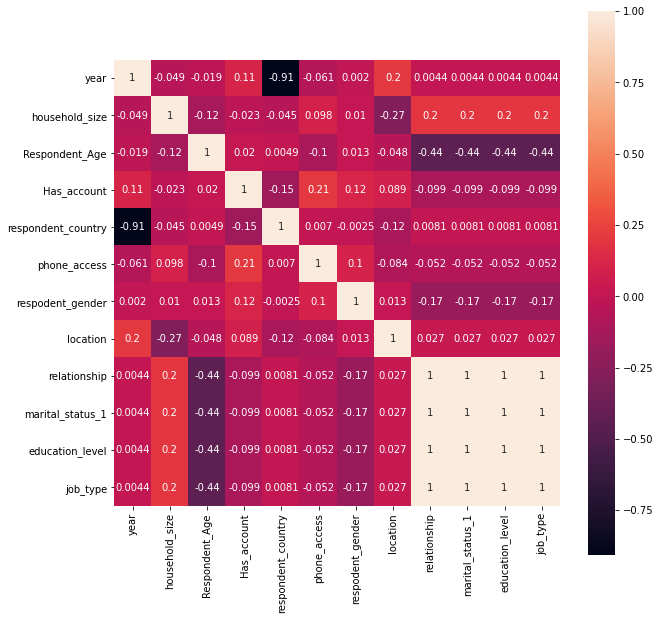

In [597]:
# create a heatmap of the correlations of the variables in the dataset
#
plt.figure(figsize=(10,10))
sns.heatmap(bank_df1.corr(), annot=True, square=True) 

there is a strong positive correlation between the level of education and job type.

there is a week postive correction between the corespondent age and Has account. thus there is no relationship between the two.

there is a strong positive correlation between marital status and job type as well as relationship.

##bivariance variable analysis

In [598]:
#bivariate summary
#
#preview of average respodent age for the bank account holder

bank_df1.pivot_table(values='Has_account', columns='Respondent_Age', aggfunc='mean')

Respondent_Age,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0,53.0,54.0,55.0,...,61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0,73.0,74.0,75.0,76.0,77.0,78.0,79.0,80.0,81.0,82.0,83.0,84.0,85.0,86.0,87.0,88.0,89.0,90.0,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0
Has_account,0.01087,0.021097,0.036021,0.060086,0.057878,0.093817,0.101786,0.131034,0.143113,0.149045,0.184943,0.141343,0.168464,0.178988,0.168744,0.17316,0.178218,0.163498,0.163107,0.163658,0.199561,0.18287,0.203267,0.145946,0.183016,0.140127,0.238739,0.157609,0.170635,0.14795,0.164751,0.154362,0.15674,0.143411,0.174888,0.15493,0.143885,0.149194,0.167382,0.136054,...,0.136691,0.148936,0.144578,0.09375,0.103093,0.118644,0.104839,0.147287,0.103448,0.113553,0.138298,0.154639,0.133333,0.129032,0.067568,0.125,0.107143,0.085366,0.122807,0.145161,0.125,0.125,0.060606,0.1,0.036364,0.12,0.066667,0.083333,0.0625,0.035714,0.0,0.0,0.25,0.0,0.166667,0.0,0.0,0.0,0.0,0.0


the highest average age with thosee who have account is 42 years

In [599]:
# Respondent_Age
bank_df1.pivot_table(values='Has_account', columns='gender_of_respondent', aggfunc='mean')

gender_of_respondent,Female,Male
Has_account,0.107503,0.189745


female are the highest account holder

In [611]:
bank_df1.pivot_table(values='Has_account', columns='household_size', aggfunc='mean')

household_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,20.0,21.0
Has_account,0.027778,0.170825,0.12362,0.143142,0.1475,0.151694,0.132085,0.128447,0.114865,0.101695,0.13089,0.090909,0.106061,0.08,0.222222,0.181818,0.0,1.0,0.0,0.0,0.0


those with the household size of 14 members are the highest account holder.

## 10.0 Multivariate Analysis

###Principal Component Analysis(PCA)

In [607]:
# Step 1: Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [608]:
#Step 2: Let's take a look at what our dataset looks like
bank_df2.head()

,household_size,Respondent_Age,gender_of_respondent,Has_account,respondent_country
0,3.0,24.0,Female,1,0
1,5.0,70.0,Female,0,0
2,5.0,26.0,Male,1,0
3,5.0,34.0,Female,0,0
4,8.0,26.0,Male,0,0


In [609]:
# Step 3: Preprocessing
# The first preprocessing step is to divide the dataset into a feature set and corresponding labels. 
# The following script performs this task. The script below stores the feature sets into the X variable 
# and the series of corresponding labels in to the y variable.
# 
x= bank_df2.drop('gender_of_respondent', 1)
y= bank_df2['gender_of_respondent')

print(x)


SyntaxError: ignored

In [ ]:
# Step 4: Splitting the dataset into the Training set and Test set
# The next preprocessing step is to divide data into training and test sets. 
# We execute the following script to do so:
#
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
#step 4: Normalization
# As mentioned earlier, PCA performs best with a normalized feature set. 
# We will perform standard scalar normalization to normalize our feature set. 
# To do this, we execute the following code:
# 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#step 5: appying PCA
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
#step 6: Explained Variance Ratio
explained_variance = pca.explained_variance_ratio_
#
# The values for the explained_variance variable looks like what is shown in the output. 
# It can be seen that first principal component is responsible for 33% variance. 
# Similarly, the second principal component causes 13% variance in the dataset. 
# Collectively we can say that (33 + 13) 46% percent of the classification information contained 
# in the feature set is captured by the first two principal components
explained_variance

the 46% of the classification information is contained in the feature set is captured by the first two pricnipals.

In [ ]:
 #step 6: Let's first try to use 1 principal component to train our algorithm. To do so, execute the following code:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
#step 7: using random forest classification in making Predictions
# In this case we'll use random forest classification for making the predictions.
# 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
# Step 8: Performance Evaluation
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))
# Noting that from the output that with only one feature, 
# the random forest algorithm is able to correctly predict 28 out of 30 instances, 
# resulting in 91% accuracy

###Linear Discriminant Analysis (LDA)

In [ ]:
bank_df2.head()

In [ ]:
#step 1:  Once dataset is loaded into a pandas data frame object, the first step is to divide dataset 
# into features and corresponding labels and then divide the resultant dataset into training and test sets. 
# The following code divides data into labels and feature set. 
# The code assigns the first four columns of the dataset i.e. the feature set to X variable 
# while the values in the fifth column (labels) are assigned to the y variable
X = bank_df2.iloc[:, 2:12].values
y = bank_df2.iloc[:, 12].values

In [ ]:
#step 2: The following code divides data into training and test sets
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
#step 3: Feature scaling
# We now need to perform feature scaling. We execute the following code to do so:
# 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
 #step 4: Peforming LDA
# It requires only four lines of code to perform LDA with Scikit-Learn. 
# The LinearDiscriminantAnalysis class of the sklearn.discriminant_analysis 
# library can be used to Perform LDA in Python. 
# Let's take a look at the following code
#

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [ ]:
#step 5: Training and Making Predictions
# We will use the random forest classifier to evaluate the performance of a PCA-reduced algorithms as shown
# 

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
#:step 6: Evaluating the Performance
# As always, the last step is to evaluate performance of the algorithm 
# with the help of a confusion matrix and find the accuracy of the prediction.
# 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))
# Noting that from the output that with only one feature, 
# the random forest algorithm is able to correctly predict the instances, 
# resulting in 91% accuracy

the random forest algorithm is able to correctly predict the instances, resulting in 91% accuracy

###multivariate summary

In [615]:
#multivariate summary
#
#relatioship between gender and bank account.
bank_df1.groupby(["gender_of_respondent","Has_account"])["uniqueid"].count()

gender_of_respondent  Has_account
Female                0              12287
                      1               1480
Male                  0               7759
                      1               1817
Name: uniqueid, dtype: int64

more female does not have account at 12287 compared to those who have of the total female respondent.
however, female still lead with having bank account in the total gender polutaion.



In [627]:
#
bank_df1.groupby(["Respondent_Age","Has_account"])["uniqueid"].count().sort_values(ascending=False).head(60) 

Respondent_Age  Has_account
30.0            0              867
35.0            0              695
25.0            0              668
28.0            0              617
20.0            0              586
32.0            0              581
18.0            0              562
40.0            0              558
23.0            0              504
22.0            0              503
26.0            0              498
27.0            0              486
24.0            0              479
45.0            0              478
17.0            0              464
16.0            0              455
33.0            0              440
38.0            0              439
19.0            0              438
34.0            0              431
21.0            0              425
29.0            0              422
31.0            0              382
50.0            0              368
36.0            0              365
37.0            0              353
42.0            0              338
60.0            0          

30years old indidual lead with having bank account.

In [628]:
#relationship between having bank account and country
bank_df1.groupby(["country","Has_account"])["uniqueid"].count()

country   Has_account
Kenya     0              4544
          1              1520
Rwanda    0              7687
          1               997
Tanzania  0              5901
          1               599
Uganda    0              1914
          1               181
Name: uniqueid, dtype: int64

kenya leads with individuals having bank accounts.

Rwanda leads with indivuals without banks accounts.

In [630]:
#relationship between type of job and having account
#
bank_df1.groupby(["Type_of_Job","Has_account"])["uniqueid"].count().sort_values(ascending=False).head(20)

Type_of_Job                   Has_account
Self employed                 0              5517
Informally employed           0              5110
Farming and Fishing           0              4788
Remittance Dependent          0              2269
Other Income                  0               881
Self employed                 1               844
Farming and Fishing           1               634
No Income                     0               605
Formally employed Private     1               567
                              0               481
Informally employed           1               440
Formally employed Government  1               299
Remittance Dependent          1               240
Government Dependent          0               197
Other Income                  1               196
Dont Know/Refuse to answer    0               111
Formally employed Government  0                87
Government Dependent          1                50
Dont Know/Refuse to answer    1                14
No Incom

those in **self employment and informal emloyment** majority don't have account. 5517 in self employment don't have bank account.
interstingly, still they are the ones stilling topping individual with bank account.

In [617]:
#relationship between level of education and having bank account
#
bank_df1.groupby(["Level_of _Educuation","Has_account"])["uniqueid"].count().sort_values(ascending=False).head(10)

Level_of _Educuation             Has_account
Primary education                0              11606
No formal education              0               4291
Secondary education              0               3226
Primary education                1               1083
Secondary education              1                981
Tertiary education               1                590
                                 0                554
Vocational/Specialised training  1                456
                                 0                345
No formal education              1                176
Name: uniqueid, dtype: int64

those with primary education leads in those without bank account at as well as they are still the highest bank account holder too.

In [618]:
#relationship between location and bank account
#
bank_df1.groupby(["Type_of_Location","Has_account"])["uniqueid"].count().sort_values(ascending=False).head(10)

Type_of_Location  Has_account
Rural             0              12601
Urban             0               7445
Rural             1               1663
Urban             1               1634
Name: uniqueid, dtype: int64

rural respodent leads with those without bank account at 12601.interestingly, rural folks still lead in having bank account when compared to urban respondents.

## 11. Implementing the Solution

In [ ]:
# Implementing the Solution
#factors/predictors that determines whether an individual has bank account


*   country of the indivual matters as Tanzania is leading in those indivual with the bank account.
*   Age of an indivual doesn't matter.
* Gender matters since the female are the highest bank account holder.
*  level of education and job type determine on whether an indivual will have bank account.



## 12. Challenging the solution

In [ ]:
# Reviewing the Solution 

the best question could have been to indentify those without bank account.

## 13. Summary & Recommendations

It was discovered only 14% of the respodent had bank account. there is a need for educating the public on the importance of having bank account. 

The age group also matter on having bank account, 30 years old indivual leads in having bank account, this might be because at this point they get employed and are more enlightened.

kenya has the highest individuals with bank account. this might be because of the several bank halls accross the country.

Ladies leads in individuals with bank accounts. this might be attributed to saving calture and quest for future financial freedom.



## 14. Follow up questions

### a). Did we have the right data?

the data was right.

## b). Do we need other data to answer our question?

No



### c). Did we have the right question?

i think the right question could have been factors that hinder individuals having bank account.